### Predicting Heart Disease
In this example, we will build and evaluate machine learning models to predict heart disease based on diagnostic measurements. We will use the Heart Disease UCI dataset from the UCI Machine Learning Repository.


##### Objective:
Predict whether a patient has heart disease based on diagnostic measurements.
##### Dataset:
Heart Disease UCI dataset from the UCI Machine Learning Repository.

**Data Description**
The dataset contains various diagnostic measurements for patients, as well as a target variable indicating the presence or absence of heart disease.

##### Features: #####

    1. age: age in years
    2. sex: Sex (1 = male; 0 = female).
    3. cp: Chest pain type (0-3).
    4. trestbps: Resting blood pressure (in mm Hg on admission to the hospital).
    5. chol: Serum cholesterol in mg/dl.
    6. fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
    7. restecg: Resting electrocardiographic results (0-2).
    8. thalach: Maximum heart rate achieved.
    9. exang: Exercise-induced angina (1 = yes; 0 = no).
    10. oldpeak: ST depression induced by exercise relative to rest.
    11. slope: The slope of the peak exercise ST segment (0-2).
    12. ca: Number of major vessels (0-3) colored by fluoroscopy.
    13. thal: Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect).
    14. target: Diagnosis of heart disease (1 = presence; 0 = absence).

In [56]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('data/heart_disease/processed.cleveland.data', header=None, na_values='?')

# Display the first few rows of the dataset
print(data.head())

# Assuming the location column is the last column (adjust the index if necessary)
# Filter the dataset to include only Cleveland data
# Note: If the dataset does not have a location column, this step can be skipped
# cleveland_data = data[data.iloc[:, -1] == 'cleveland']

# For this example, we assume the dataset is already filtered to include only Cleveland data
cleveland_data = data

# Display the first few rows of the filtered dataset
print(cleveland_data.head())

# Define column names for the dataset
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
cleveland_data.columns = column_names

     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0
     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       s

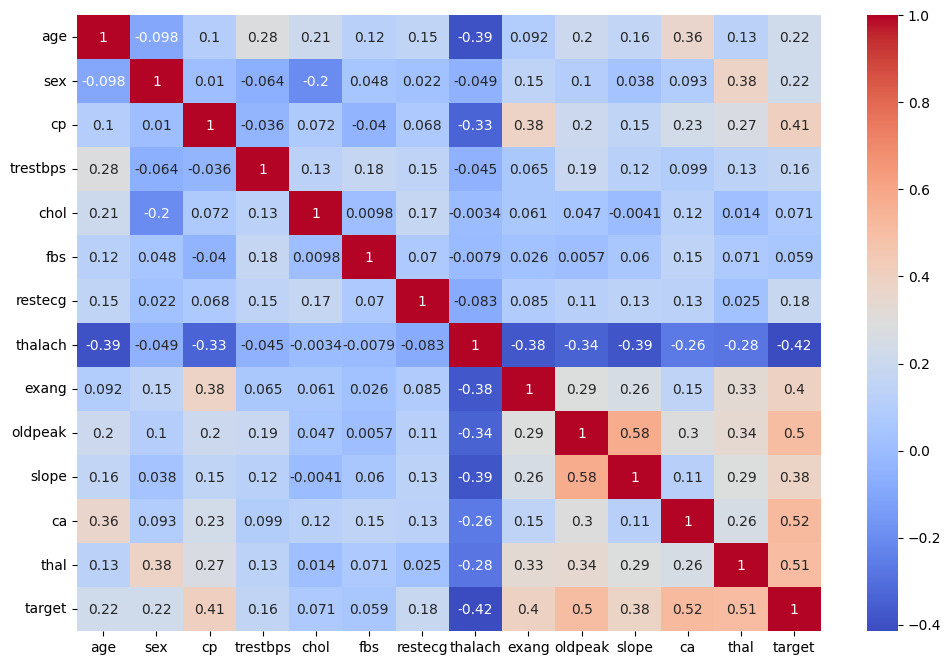

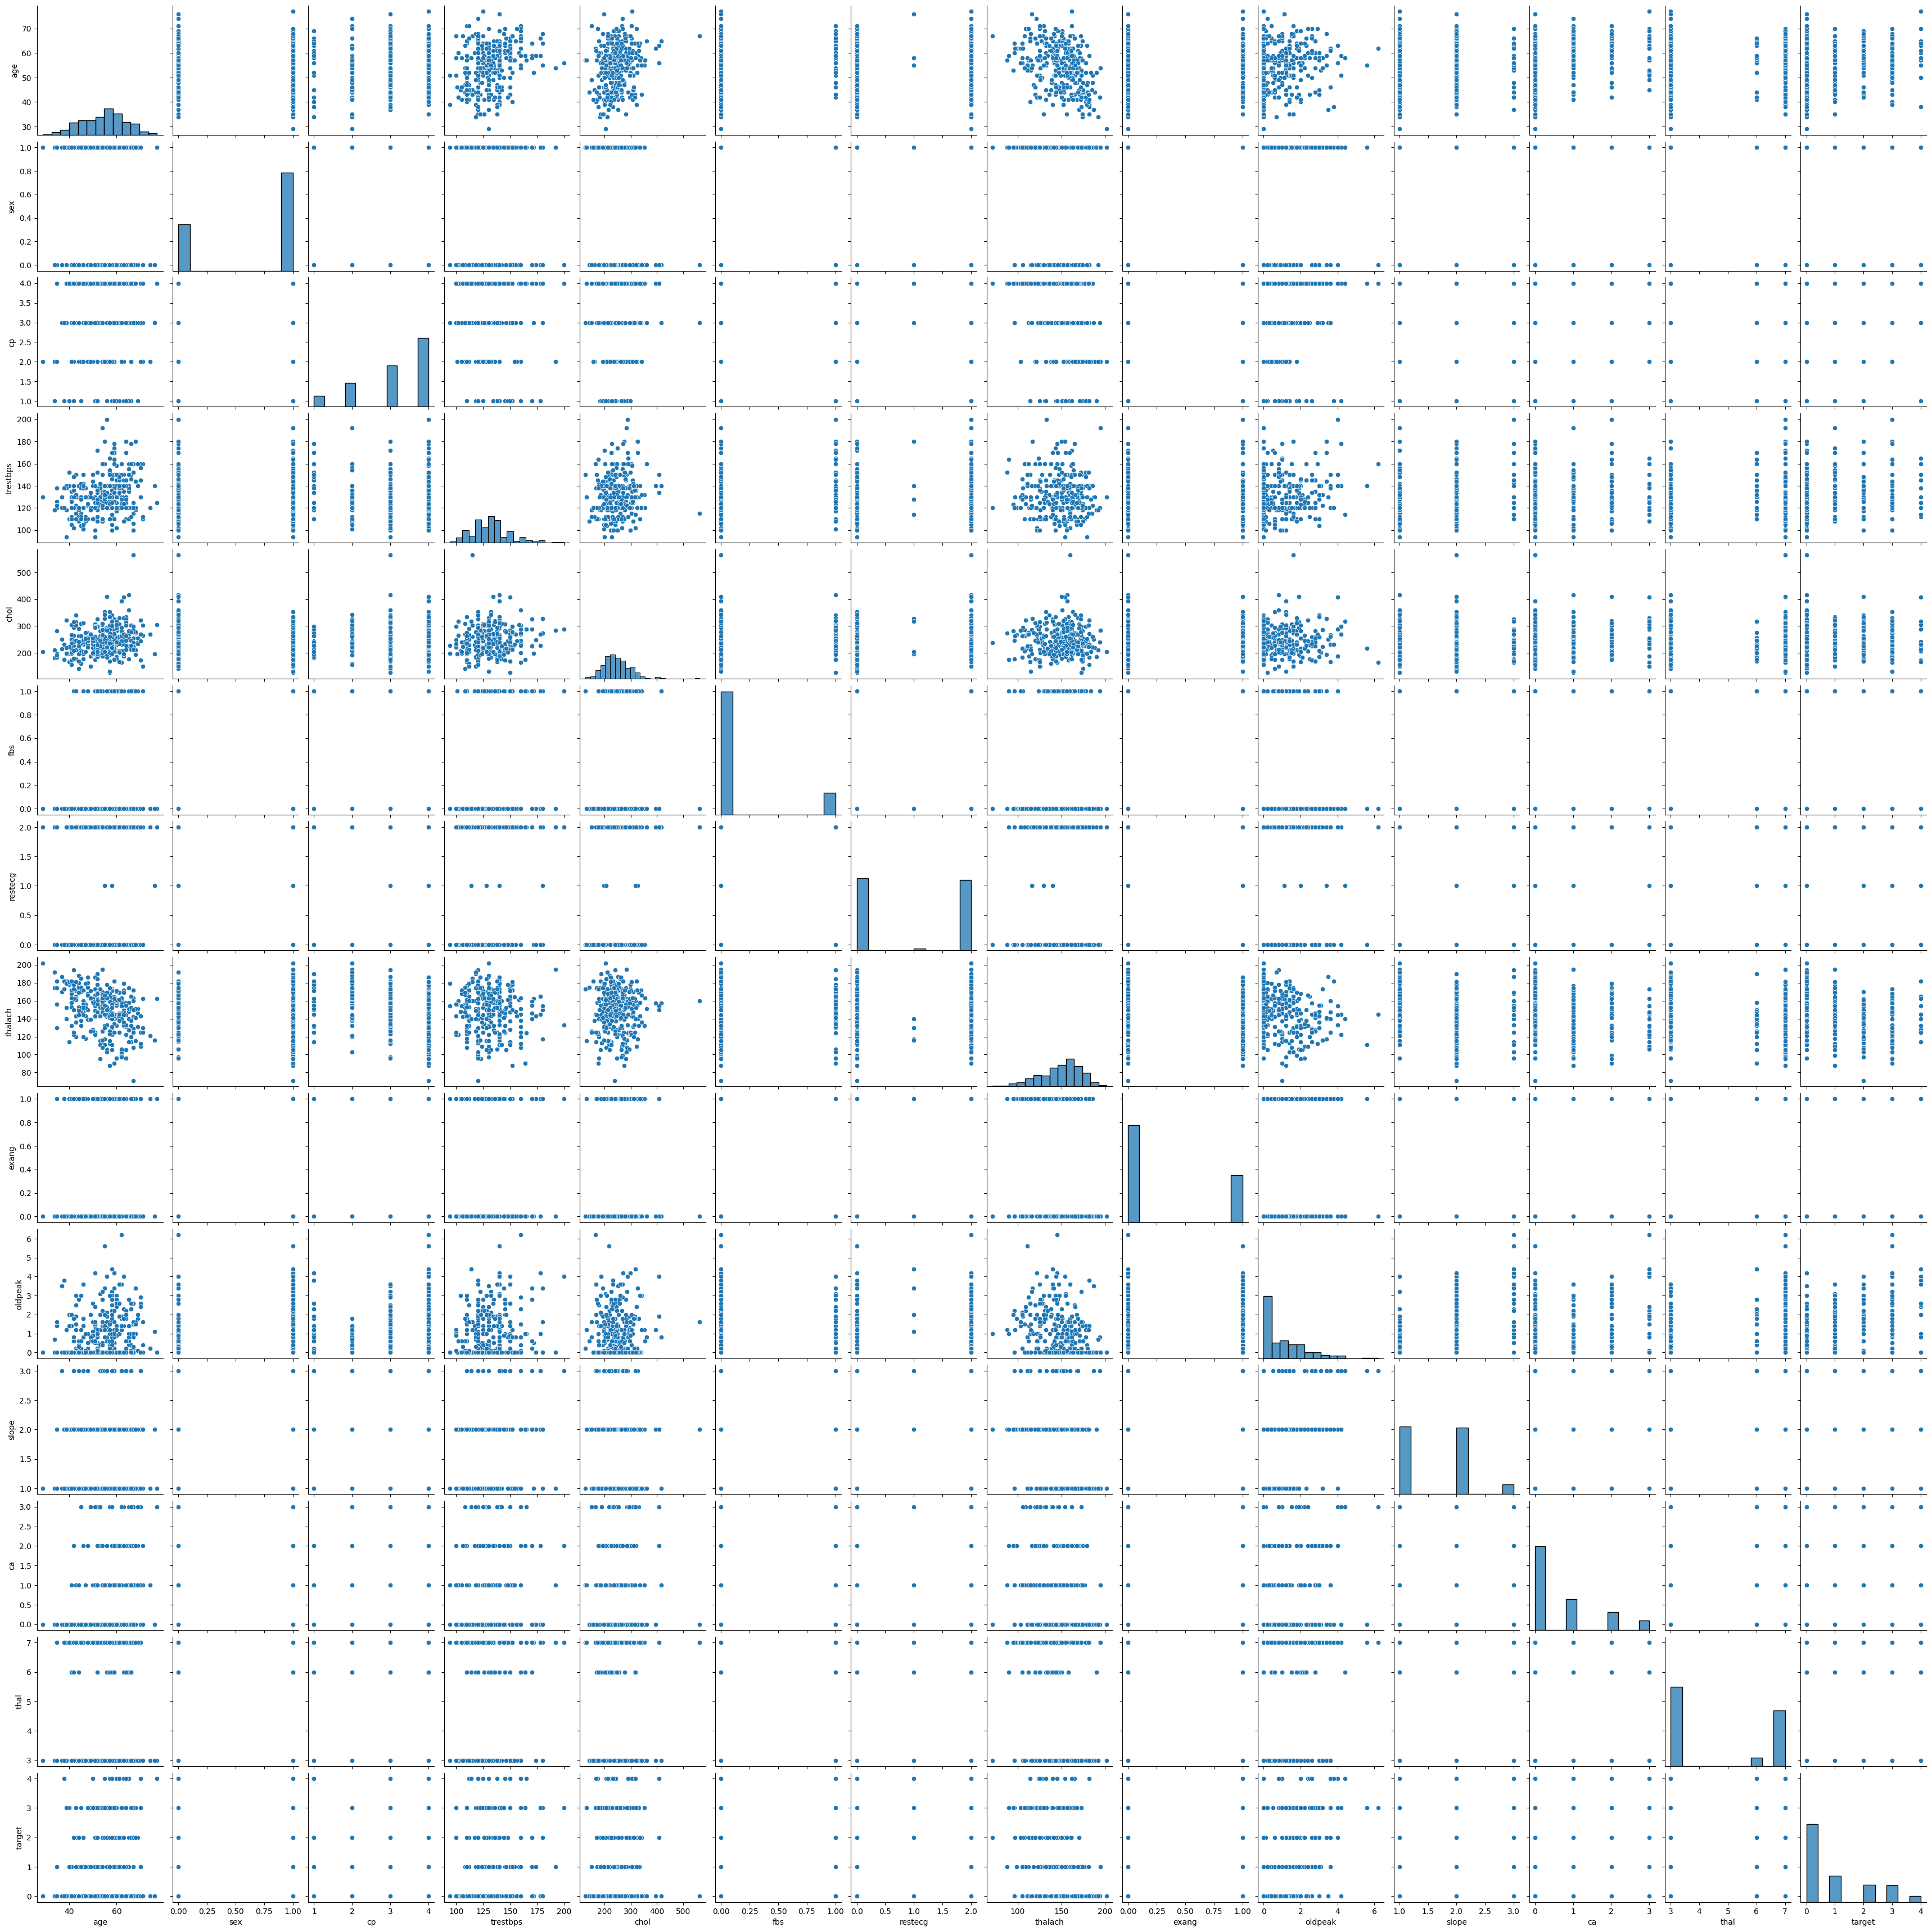

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(cleveland_data.isnull().sum())

# Summary statistics
print(cleveland_data.describe())

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cleveland_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pairplot
sns.pairplot(cleveland_data)
plt.show()

Model Building and Training

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('data/heart_disease/processed.cleveland.data', header=None, na_values='?')

# Define column names for the dataset
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data.columns = column_names

# Check for missing values
print(data.isnull().sum())

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Split the data into training and testing sets
X = data_imputed.drop('target', axis=1)
y = data_imputed['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
# increase the mz_iter to 200 to avoid the warning of convergence
#  -- ConvergenceWarning: lbfgs failed to converge (status=1):
    # STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.
    # Increase the number of iterations (max_iter) or scale the data as shown in:
lr = LogisticRegression(max_iter=5000, solver='liblinear')
lr.fit(X_train, y_train)

# Train a Decision Tree model with GridSearchCV
param_grid_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=3)
grid_dt.fit(X_train, y_train)
dt = grid_dt.best_estimator_

# Train a Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Train a Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Train a Bagging Classifier
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)

# Train a Support Vector Classifier with GridSearchCV
param_grid_svc = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid_svc = GridSearchCV(SVC(), param_grid_svc, cv=3)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

# Train a K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


KNeighborsClassifier()

Results and Evaulations

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the models
models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Bagging': bagging,
    'Support Vector Classifier': svc,
    'K-Nearest Neighbors': knn
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f'{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')

Logistic Regression - Accuracy: 0.57, Precision: 0.57, Recall: 0.34, F1-Score: 0.33
Decision Tree - Accuracy: 0.54, Precision: 0.64, Recall: 0.33, F1-Score: 0.27
Random Forest - Accuracy: 0.52, Precision: 0.46, Recall: 0.28, F1-Score: 0.26
Gradient Boosting - Accuracy: 0.48, Precision: 0.39, Recall: 0.23, F1-Score: 0.21
Bagging - Accuracy: 0.56, Precision: 0.39, Recall: 0.35, F1-Score: 0.36
Support Vector Classifier - Accuracy: 0.48, Precision: 0.90, Recall: 0.20, F1-Score: 0.13
K-Nearest Neighbors - Accuracy: 0.44, Precision: 0.31, Recall: 0.19, F1-Score: 0.14


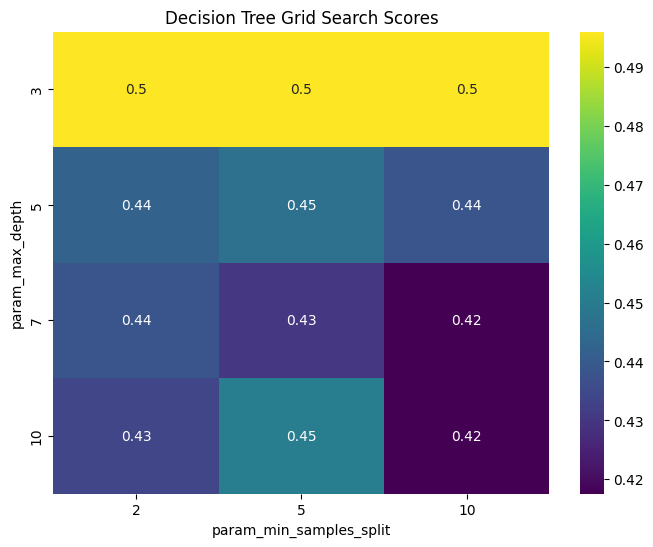

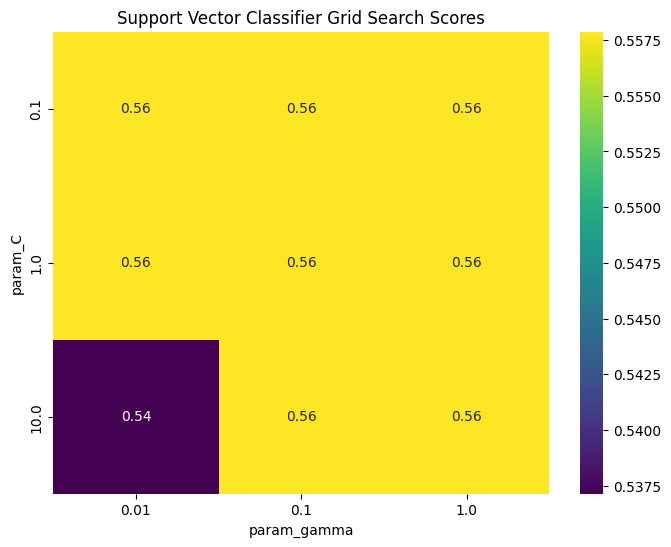

In [60]:
# Display feature importances for the Random Forest model
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Heat map for Decision Tree
results_dt = pd.DataFrame(grid_dt.cv_results_)
scores_dt = results_dt.pivot(index="param_max_depth", columns="param_min_samples_split", values="mean_test_score")
plt.figure(figsize=(8, 6))
sns.heatmap(scores_dt, annot=True, cmap='viridis')
plt.title('Decision Tree Grid Search Scores')
plt.show()

# Heat map for Support Vector Classifier
results_svc = pd.DataFrame(grid_svc.cv_results_)
scores_svc = results_svc.pivot(index="param_C", columns="param_gamma", values="mean_test_score")
plt.figure(figsize=(8, 6))
sns.heatmap(scores_svc, annot=True, cmap='viridis')
plt.title('Support Vector Classifier Grid Search Scores')
plt.show()